### ÍπÄÌòÑÏßÑ ÏûëÏóÖÎÇ¥Ïö© Ï†ïÎ¶¨
* wandbÎ°ú Í≤∞Í≥ºÏπò logging Ï∂îÍ∞Ä
* X,Y Ï¢åÌëú Í≤∞Ï∏°Ïπò Ï∂îÍ∞Ä
* xyÍ≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞ : 1_xy_concat.csv Í≤∞Í≥º ÌååÏùº
* ÎåÄÏ§ëÍµêÌÜµ Í∞ÄÏ§ëÏπò : 2_xy_busSubway.csv Í≤∞Í≥º ÌååÏùº
* Ï†ÑÏö© Î©¥Ï†Å Ïù¥ÏÉÅÏπò Ï†úÍ±∞ (275Ïù¥ÏÉÅ Ï†úÍ±∞)
* ÏßÄÌïòÏ∏µ 1Í∞íÏúºÎ°ú ÎåÄÏ≤¥
* Í±¥Ï∂ïÎÖÑÎèÑ Ïã†Ï∂ïÏó¨Î∂Ä 2009 -> 2004ÎÖÑÏúºÎ°ú Í∞í Î≥ÄÍ≤Ω* 
* RandomForestRegressor : model = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1, warm_start=True)  
* ÏàòÏπòÌòï, Ïó∞ÏÜçÌòï Î≥ÄÏàò : Î°úÍ∑∏Î≥ÄÌôò
  dt_train[col] = np.log1p(dt_train[col])
  dt_test[col] = np.log1p(dt_test[col])
* ÏòàÏ∏°Í∞í ÏõêÎ≥µ pred = np.expm1(pred)
* Ïã§Ï†úÍ∞í ÏõêÎ≥µ y_val = np.expm1(y_val) 
* ÏÇ≠Ï†ú: 'Î≤àÏßÄ', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏',  'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å','k-Ïó∞Î©¥Ï†Å'

# **üè† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Baseline code**
> Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä ÏòàÏ∏° ÎåÄÌöåÏóê Ïò§Ïã† Ïó¨Îü¨Î∂Ñ ÌôòÏòÅÌï©ÎãàÎã§! üéâ     
> ÏïÑÎûò baselineÏóêÏÑúÎäî RandomForestÎ•º ÌôúÏö©Ìï¥ ML Î∞©Î≤ïÎ°†Îì§ÏùÑ Ïã§Ï†ú ÎåÄÌöåÏóê Ï†ÅÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
> Í∞ïÏùòÎäî google colabÏúºÎ°ú Ïã§ÌñâÌïòÏòÄÍ∏∞Ïóê ÏïÑÎûòÏùò Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏΩîÎìúÏôÄÎäî ÏùºÎ∂Ä Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [104]:
'''
%pip install eli5==0.13.0

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
!apt-get install -y fonts-nanum

# wandb ÏÑ§Ïπò
%pip install wandb -Uq

%pip install plotly
%pip install requests
%pip install aiohttp
%pip install geopy
%pip install geopandas
%pip install shapely
%pip install pyproj
%pip install pyarrow
%pip install lightgbm
'''

'\n%pip install eli5==0.13.0\n\n# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.\n!apt-get install -y fonts-nanum\n\n# wandb ÏÑ§Ïπò\n%pip install wandb -Uq\n\n%pip install plotly\n%pip install requests\n%pip install aiohttp\n%pip install geopy\n%pip install geopandas\n%pip install shapely\n%pip install pyproj\n%pip install pyarrow\n%pip install lightgbm\n'

### wandb ÏÇ¨Ïù¥Ìä∏ Í∞ÄÏûÖ ÌõÑ Î°úÍ∑∏Ïù∏

In [105]:
import wandb

# ÏÉÅÎã®Ïóê Îú®Îäî ÏûÖÎ†• ÏÉÅÏûêÏóê ÏûêÏã†Ïùò ÌÇ§ ÏûÖÎ†•
# wandb.login()

# ÎòêÎäî wandb.login(key='ÏûêÏã†Ïùò ÌÇ§Î•º ÌïúÎ≤àÎßå ÎÑ£Ïñ¥ÏÑú ÎèåÎ†§Ï£ºÎ©¥ file: /data/ephemeral/home/.netrcÏóê Ï†ÄÏû•ÎêòÏñ¥ ÎÇ¥ PCÏóêÏÑúÎäî ÏûêÎèô Î°úÍ∑∏Ïù∏')

# ÌïòÏúÑ Ï£ºÏÑù ÌíÄÍ≥† ÏûêÏã†Ïùò ÌÇ§ ÏÑ∏ÌåÖ
wandb.login(key='c3948af69a19726918616f74145c1059ec37132c')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /data/ephemeral/home/.netrc


True

In [106]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from sklearn.inspection import permutation_importance
import plotly
from sklearn.metrics import r2_score

from geopy.distance import geodesic
from shapely.geometry import Point
import geopandas as gpd
from geopandas.tools import sjoin
import pyproj

import pyarrow.parquet as arrow_parquet
import pyarrow as pa
from lightgbm import LGBMRegressor
import re
import math
from sklearn.model_selection import TimeSeriesSplit


## 2. Data Load

#### 2.1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [107]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
train_path = '../train.csv'
test_path  = '../test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

In [108]:
# Train dataÏôÄ Test data shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('Train data shape : ', dt.shape, 'Test data shape : ', dt_test.shape)

Train data shape :  (1118822, 52) Test data shape :  (9272, 51)


## 3. Data Preprocessing

- Î™®Îç∏ÎßÅ Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞ ÎÇ¥ Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Îì±ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Î≤îÏ£ºÌòïÍ≥º Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§!
- Î®ºÏ†Ä, Ïö©Ïù¥Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ trainÍ≥º test dataÎ•º Ìï©Ïπú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [109]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
dt['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt, dt_test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [110]:
concat['is_test'].value_counts()      # trainÍ≥º test dataÍ∞Ä ÌïòÎÇòÎ°ú Ìï©Ï≥êÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

0    1118822
1       9272
Name: is_test, dtype: int64

In [111]:
# Ïª¨Îüº Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
concat = concat.rename(columns={'Ï†ÑÏö©Î©¥Ï†Å(„é°)':'Ï†ÑÏö©Î©¥Ï†Å',
                                'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)':'Îã®ÏßÄÎ∂ÑÎ•ò', 
                                'k-Ï†ÑÌôîÎ≤àÌò∏':'Ï†ÑÌôîÎ≤àÌò∏', 
                                'k-Ìå©Ïä§Î≤àÌò∏':'Ìå©Ïä§Î≤àÌò∏',
                                'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)':'ÏÑ∏ÎåÄÌÉÄÏûÖ',
                                'k-Í¥ÄÎ¶¨Î∞©Ïãù':'Í¥ÄÎ¶¨Î∞©Ïãù',
                                'k-Î≥µÎèÑÏú†Ìòï':'Î≥µÎèÑÏú†Ìòï', 
                                'k-ÎÇúÎ∞©Î∞©Ïãù':'ÎÇúÎ∞©Î∞©Ïãù',
                                'k-Ï†ÑÏ≤¥ÎèôÏàò':'Ï†ÑÏ≤¥ÎèôÏàò', 
                                'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò':'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò',
                                'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)':'Í±¥ÏÑ§ÏÇ¨',
                                'k-ÏãúÌñâÏÇ¨':'ÏãúÌñâÏÇ¨',
                                'k-Ïó∞Î©¥Ï†Å':'Ïó∞Î©¥Ï†Å',
                                'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å':'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
                                'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å':'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å',
                                'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)':'Ï†ÑÏö©Î©¥Ï†Å<60',
                                'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)':'Ï†ÑÏö©Î©¥Ï†Å60~85',
                                'k-85„é°~135„é°Ïù¥Ìïò':'Ï†ÑÏö©Î©¥Ï†Å85~135',
                                'k-135„é°Ï¥àÍ≥º':'Ï†ÑÏö©Î©¥Ï†Å>135', 
                                'k-ÌôàÌéòÏù¥ÏßÄ':'ÌôàÌéòÏù¥ÏßÄ',
                                'k-Îì±Î°ùÏùºÏûê':'Îì±Î°ùÏùºÏûê', 
                                'k-ÏàòÏ†ïÏùºÏûê':'ÏàòÏ†ïÏùºÏûê'})

### 3.1. Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Î≥¥Í∞Ñ
- Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨Ìï† Îïå ÎßéÏù¥ Ïì∞Îäî Î∞©Î≤ïÏùÄ ÏÇ≠Ï†ú(Deletion)Í≥º ÎåÄÏ≤¥(Imputation) ÏûÖÎãàÎã§.
- Î≥∏ BaselineÏóêÏÑúÎäî Í≤∞Ï∏°ÏπòÍ∞Ä 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÎäî Ï†úÍ±∞ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ Í≤∞Ï∏°ÏπòÎäî ÎåÄÏ≤¥ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≤†ÏäµÎãàÎã§.
  - Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî 'NULL' Ïù¥ÎùºÎäî ÏûÑÏùòÏùò Î≤îÏ£ºÎ°ú ÎåÄÏ≤¥Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [112]:
# Ïã§Ï†úÎ°ú Í≤∞Ï∏°ÏπòÎùºÍ≥† ÌëúÏãúÎäî ÏïàÎêòÏñ¥ÏûàÏßÄÎßå ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÎì§Ïù¥ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.
# ÏïÑÎûò 3Í∞ÄÏßÄÏùò Í≤ΩÏö∞ Î™®Îëê ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
# display(concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].value_counts())

In [113]:
# display(concat['Í±∞ÎûòÏú†Ìòï'].value_counts())

In [114]:
# display(concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].value_counts())

In [115]:
# ÏúÑ Ï≤òÎüº ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî ÏπºÎüºÏùÄ Í≤∞Ï∏°ÏπòÏôÄ Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÌïòÎØÄÎ°ú, np.nanÏúºÎ°ú Ï±ÑÏõå Í≤∞Ï∏°ÏπòÎ°ú Ïù∏ÏãùÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'] = concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].replace(' ', np.nan)
concat['Í±∞ÎûòÏú†Ìòï'] = concat['Í±∞ÎûòÏú†Ìòï'].replace('-', np.nan)
concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'] = concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].replace('-', np.nan)
concat['Îã®ÏßÄÎ∂ÑÎ•ò'] = concat['Îã®ÏßÄÎ∂ÑÎ•ò'].replace('ÎèÑÏãúÌòï ÏÉùÌôúÏ£ºÌÉù(Ï£ºÏÉÅÎ≥µÌï©)', 'Ï£ºÏÉÅÎ≥µÌï©')
concat['Îã®ÏßÄÎ∂ÑÎ•ò'] = concat['Îã®ÏßÄÎ∂ÑÎ•ò'].replace('ÎèÑÏãúÌòï ÏÉùÌôúÏ£ºÌÉù(ÏïÑÌååÌä∏)', 'ÏïÑÌååÌä∏')
concat['ÏïÑÌååÌä∏Î™Ö'] = concat['ÏïÑÌååÌä∏Î™Ö'].fillna('Ïù¥Î¶ÑÏóÜÏùå')

In [116]:
# EDAÏóê ÏïûÏÑú Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
display(concat.isnull().sum())
display(len(concat.columns))

ÏãúÍµ∞Íµ¨                          0
Î≤àÏßÄ                         227
Î≥∏Î≤à                          75
Î∂ÄÎ≤à                          75
ÏïÑÌååÌä∏Î™Ö                         0
Ï†ÑÏö©Î©¥Ï†Å                         0
Í≥ÑÏïΩÎÖÑÏõî                         0
Í≥ÑÏïΩÏùº                          0
Ï∏µ                            0
Í±¥Ï∂ïÎÖÑÎèÑ                         0
ÎèÑÎ°úÎ™Ö                          0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                1121899
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                 1111271
Í±∞ÎûòÏú†Ìòï                   1086451
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                 1090013
Îã®ÏßÄÎ∂ÑÎ•ò                    877273
Ï†ÑÌôîÎ≤àÌò∏                    876850
Ìå©Ïä§Î≤àÌò∏                    879348
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob             1058958
ÏÑ∏ÎåÄÌÉÄÏûÖ                    876125
Í¥ÄÎ¶¨Î∞©Ïãù                    876125
Î≥µÎèÑÏú†Ìòï                    876454
ÎÇúÎ∞©Î∞©Ïãù                    876125
Ï†ÑÏ≤¥ÎèôÏàò                    877207
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   876125
Í±¥ÏÑ§ÏÇ¨                    

53

In [117]:
# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
# fig = plt.figure(figsize=(13, 2))
# missing = concat.isnull().sum() / concat.shape[0]
# missing = missing[missing > 0]
# missing.sort_values(inplace=True)
# missing.plot.bar(color='orange')
# plt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')
# plt.show()

- ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú Î≥º Ïàò ÏûàÎã§ÏãúÌîº Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÎì§ÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä Ìï¥Îãπ ÏπºÎüºÏùò element Ï§ë 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî ÏÉÅÌô©Ïù¥ Îê©ÎãàÎã§.
- Îî∞ÎùºÏÑú Î≥∏ Baseline ÏóêÏÑúÎäî Ïù¥ ÏπºÎüºÏùÄ ÏòàÏ∏°Ïóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Í≥† ÌåêÎã®Ìï¥ ÏÇ≠Ï†úÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [118]:
# NullÍ∞íÏù¥ 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÏùÄ ÏÇ≠Ï†úÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() <= 1000000]))     # ÎÇ®Í≤®Ïßà Î≥ÄÏàòÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() >= 1000000]))

* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ : ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'Ï†ÑÌôîÎ≤àÌò∏', 'Ìå©Ïä§Î≤àÌò∏', 'ÏÑ∏ÎåÄÌÉÄÏûÖ', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Í±¥ÏÑ§ÏÇ¨', 'ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'Ï†ÑÏö©Î©¥Ï†Å<60', 'Ï†ÑÏö©Î©¥Ï†Å60~85', 'Ï†ÑÏö©Î©¥Ï†Å85~135', 'ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test']
* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§ : ['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'Ï

In [119]:
# ÏúÑÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§Îßå Í≥®Îùº ÏÉàÎ°úÏö¥ concat_select Í∞ùÏ≤¥Î°ú Ï†ÄÏû•Ìï¥Ï§çÎãàÎã§.
selected = list(concat.columns[concat.isnull().sum() <= 1000000])
concat_select = concat[selected]
concat_select.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  ...  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712    8  3  1987  ...   

    Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX  \
0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N  127.05721   

         Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  is_test  
0  37.476763  2022-11-17 10:19:06.0  124000.0        0  

[1 rows x 45 columns]

In [120]:
# Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ï¥àÍ≥ºÏù∏ ÏπºÎüºÏù¥ Ï†úÍ±∞Îêú Î™®ÏäµÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
display(concat_select.isnull().sum())
display(len(concat_select.columns))
# targetÎ≥ÄÏàòÎäî test dataset Í∞úÏàòÎßåÌÅº(9272) Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

ÏãúÍµ∞Íµ¨                         0
Î≤àÏßÄ                        227
Î≥∏Î≤à                         75
Î∂ÄÎ≤à                         75
ÏïÑÌååÌä∏Î™Ö                        0
Ï†ÑÏö©Î©¥Ï†Å                        0
Í≥ÑÏïΩÎÖÑÏõî                        0
Í≥ÑÏïΩÏùº                         0
Ï∏µ                           0
Í±¥Ï∂ïÎÖÑÎèÑ                        0
ÎèÑÎ°úÎ™Ö                         0
Îã®ÏßÄÎ∂ÑÎ•ò                   877273
Ï†ÑÌôîÎ≤àÌò∏                   876850
Ìå©Ïä§Î≤àÌò∏                   879348
ÏÑ∏ÎåÄÌÉÄÏûÖ                   876125
Í¥ÄÎ¶¨Î∞©Ïãù                   876125
Î≥µÎèÑÏú†Ìòï                   876454
ÎÇúÎ∞©Î∞©Ïãù                   876125
Ï†ÑÏ≤¥ÎèôÏàò                   877207
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                  876125
Í±¥ÏÑ§ÏÇ¨                    877637
ÏãúÌñâÏÇ¨                    877834
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº          876259
Ïó∞Î©¥Ï†Å                    876125
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                 876170
Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å                876125
Ï†ÑÏö©Î©¥Ï†Å<60   

45

### Ï¢åÌëúx, Ï¢åÌëúy Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

### ÌòÑÏßÑÎãò ÏΩîÎìú

In [121]:
# # Ïô∏Î∂Ä Îç∞Ïù¥ÌÑ∞Î°ú Ï¢åÌëúx, Ï¢åÌëúy Í≤∞Ï∏°Ïπò Ï±ÑÏö¥ ÌååÏùº Î°úÎìú
# xy_path = '../outputFinal.csv'
# dt_xy = pd.read_csv(xy_path)

In [122]:
# # Ïô∏Î∂Ä Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Ïª¨ÎüºÎßå ÎÇ®ÍπÄ
# dt_xy_selected = dt_xy.drop(axis=1, columns=['ÏãúÍµ∞Íµ¨','Î≤àÏßÄ','ÎèÑÎ°úÎ™Ö'])
# display(dt_xy_selected.head(2))
# display(dt_xy_selected.tail(2))

In [123]:
# # Îëê Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò Ïù∏Îç±Ïä§Î•º ÎèôÏùºÌïòÍ≤å ÎßåÎì≠ÎãàÎã§. 
# # Ïù¥Î†áÍ≤å ÌïòÎ©¥ Îëê Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ Î≥ëÌï©ÌïòÍ±∞ÎÇò Îã§Î•∏ Ïó∞ÏÇ∞ÏùÑ ÏàòÌñâÌï† Îïå Ïù∏Îç±Ïä§Í∞Ä ÏùºÏπòÌïòÍ≤å Îê©ÎãàÎã§.
# # Ï¢åÌëú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Ïù∏Îç±Ïä§ == train + test Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Ïù∏Îç±Ïä§
# dt_xy_selected.index = concat_select.index

# display("Ïù∏ÌÖçÏä§Í∞Ä ÎèôÏùºÌïòÍ≤å Î≥ÄÍ≤ΩÎêòÏóàÏäµÎãàÎã§.")
# display(concat_select.index)
# display(dt_xy_selected.index)

# dt_xy_selected.head(1)

In [124]:
# #Ï¢åÌëú Îç∞Ïù¥ÌÑ∞ NaN Îç∞Ïù¥ÌÑ∞
# display(concat_select[['ÏãúÍµ∞Íµ¨','Î≥∏Î≤à','ÎèÑÎ°úÎ™Ö','Ï¢åÌëúX','Ï¢åÌëúY']][975:976])
# display(dt_xy_selected[975:976])

In [125]:
# # concat Ï¢åÌëú Ïª¨ÎüºÏùò ÎπÑÏñ¥ÏûàÎäî Í∞íÏùÑ dt_xy_selected Ïª¨Îüº 'Ï¢åÌëúX','Ï¢åÌëúY' Í∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
# concat_select['Ï¢åÌëúX'] = concat_select['Ï¢åÌëúX'].combine_first(dt_xy_selected['Ï¢åÌëúX'])
# concat_select['Ï¢åÌëúY'] = concat_select['Ï¢åÌëúY'].combine_first(dt_xy_selected['Ï¢åÌëúY'])

In [126]:
# #Ï¢åÌëú Îç∞Ïù¥ÌÑ∞ Ï±ÑÏõåÏßÑ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
# display(concat_select[['ÏãúÍµ∞Íµ¨','Î≥∏Î≤à','Î∂ÄÎ≤à','ÎèÑÎ°úÎ™Ö','Ï¢åÌëúX','Ï¢åÌëúY']][975:976])
# display(dt_xy_selected[975:976])

In [127]:
# # Í≤∞Ï∏°ÏπòÍ∞Ä Î™®Îëê Ï±ÑÏõåÏ°åÎäîÏßÄ ÌôïÏù∏
# display(concat_select['Ï¢åÌëúX'].isna().sum())
# display(concat_select['Ï¢åÌëúY'].isna().sum())

### ÎÇ¥ ÏΩîÎìú

In [128]:
# # Ïô∏Î∂Ä Îç∞Ïù¥ÌÑ∞Î°ú Ï¢åÌëúx, Ï¢åÌëúy Í≤∞Ï∏°Ïπò Ï±ÑÏö¥ ÌååÏùº Î°úÎìú
# xy_path = '../unique_address.csv'
# dt_xy = pd.read_csv(xy_path)

In [129]:
# # Ï§ëÎ≥µÎêú Ìñâ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Î∂àÎ¶¨Ïñ∏ ÏãúÎ¶¨Ï¶à ÏÉùÏÑ±
# duplicate_rows = concat_select.duplicated(subset=['ÎèÑÎ°úÎ™Ö'])

# # Ï§ëÎ≥µÎêú ÌñâÏùò Ïàò Í≥ÑÏÇ∞
# num_duplicates = duplicate_rows.sum()

# print(f"'ÎèÑÎ°úÎ™Ö'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï§ëÎ≥µÎêú ÌñâÏùò Ïàò: {num_duplicates}Í∞ú")
# print(f"Ï†ÑÏ≤¥ÏóêÏÑú Ï§ëÎ≥µÎêú Îç∞Ïù¥ÌÑ∞Î•º Î∫Ä Í∞úÏàò: {len(concat_select) - num_duplicates}Í∞ú")

In [130]:
# unique_addr_df = concat_select[['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'ÎèÑÎ°úÎ™Ö', 'ÏïÑÌååÌä∏Î™Ö', 'Ï¢åÌëúX', 'Ï¢åÌëúY']].drop_duplicates(subset='ÎèÑÎ°úÎ™Ö')
# display(len(unique_addr_df))
# display(unique_addr_df.head())

In [131]:
# display(concat_select.index)
# display(unique_addr_df.index)
# dt_xy.index = unique_addr_df.index
# display(dt_xy.index)

In [132]:
# # 'ÎèÑÎ°úÎ™Ö' Ïª¨ÎüºÏù¥ Î¨∏ÏûêÏó¥ ÌÉÄÏûÖÏù∏ÏßÄ ÌôïÏù∏ÌïòÍ≥† ÌÜµÏùºÌï©ÎãàÎã§.
# concat_select['ÎèÑÎ°úÎ™Ö'] = concat_select['ÎèÑÎ°úÎ™Ö'].astype(str)
# dt_xy['ÎèÑÎ°úÎ™Ö'] = dt_xy['ÎèÑÎ°úÎ™Ö'].astype(str)

In [133]:
# # ÏÑúÎ∏å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'ÎèÑÎ°úÎ™Ö'ÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
# dt_xy.set_index('ÎèÑÎ°úÎ™Ö', inplace=True)

In [134]:
# # ÏÑúÎ∏å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'Ï¢åÌëúX'ÏôÄ 'Ï¢åÌëúY'Ïùò ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
# coord_x_map = dt_xy['Ï¢åÌëúX']
# coord_y_map = dt_xy['Ï¢åÌëúY']

# # Î©îÏù∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò 'Ï¢åÌëúX' Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
# concat_select['Ï¢åÌëúX'] = concat_select['Ï¢åÌëúX'].fillna(concat_select['ÎèÑÎ°úÎ™Ö'].map(coord_x_map))

# # Î©îÏù∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò 'Ï¢åÌëúY' Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
# concat_select['Ï¢åÌëúY'] = concat_select['Ï¢åÌëúY'].fillna(concat_select['ÎèÑÎ°úÎ™Ö'].map(coord_y_map))

In [135]:
# # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ ÌôïÏù∏
# missing_coords = concat_select[concat_select['Ï¢åÌëúX'].isnull() | concat_select['Ï¢åÌëúY'].isnull()]
# print(missing_coords)

### xy Ï¢åÌëú ÏΩîÎìú ÎÇ¥Î≥¥ÎÇ¥Í∏∞

In [136]:
# display(len(concat_select.columns))
# concat_select.to_csv('../1_xy_concat.csv', index=False)

# Ïó¨Í∏∞ Ïù¥ÌõÑÎ∂ÄÌÑ∞ 1_xy_concat.csv Î°ú Run Í∞ÄÎä•

In [137]:
# # Ïó¨Í∏∞ Ïù¥ÌõÑÎ∂ÄÌÑ∞ run ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ ÌååÏùºÎ°ú ÌïúÎ≤à Ï†ÄÏû• ÌõÑ Îç∞Ïù¥ÌÑ∞ Î¶¨Î°úÎìú
# concat_select = pd.read_csv('../1_xy_concat.csv')
# concat_select.head(1)

### ÎåÄÏ§ëÍµêÌÜµ Í∞ÄÏ§ëÏπò Ï†ÅÏö©

In [138]:
# ### ÏïÑÌååÌä∏ÏôÄ ÏßÄÌïòÏ≤† Ïó≠Ïùò ÏúÑÏπò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î∞ÄÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò
# # bus-station density, subway-station density

# #1. ÏïÑÌååÌä∏ ÏúÑÎèÑÏôÄ Í≤ΩÎèÑ Ï†ïÎ≥¥Î•º UTM-K Ï¢åÌëúÍ≥ÑÎ°ú Î≥ÄÌôòÌïòÍ≥†, Ïù¥Î•º Í∏∞Î∞òÏúºÎ°ú ÏßÄÏò§Î©îÌä∏Î¶¨ Ïª¨ÎüºÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
# def preprocess_data(df, x_col, y_col):
#     wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 Ï¢åÌëúÍ≥Ñ (ÏúÑÎèÑ, Í≤ΩÎèÑ)
#     utm_k = pyproj.CRS('EPSG:5179')  # UTM-K Ï¢åÌëúÍ≥Ñ (ÌïúÍµ≠)
#     project = pyproj.Transformer.from_crs(wgs84, utm_k, always_xy=True).transform
    
#     df['geometry'] = df.apply(lambda row: Point(project(row[x_col], row[y_col])), axis=1)
#     return gpd.GeoDataFrame(df, geometry='geometry', crs=utm_k)

# # 2. ÏúÑÏπò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ï£ºÏñ¥ÏßÑ Î∞òÍ≤Ω ÎÇ¥Ïùò Î∞ÄÎèÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
# def calculate_density(gdf_real_estate, gdf_locations, radius):
#     gdf_real_estate['buffer'] = gdf_real_estate.geometry.buffer(radius)
    
#     joined = sjoin(gdf_locations, gdf_real_estate.set_geometry('buffer'), how='inner', predicate='within')
    
#     density = joined.groupby(joined.index_right).size().rename('density')
    
#     return gdf_real_estate.join(density, how='left').fillna(0)['density']


# # ÌÅ∞ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏûëÏùÄ Ï≤≠ÌÅ¨Î°ú ÎÇòÎàÑÏñ¥ Ï≤òÎ¶¨ÌïòÏó¨ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©ÏùÑ ÏµúÏ†ÅÌôî
# def process_in_chunks(df, locations_gdf, radius, chunk_size=10000):
#     results = []
#     for i in tqdm(range(0, len(df), chunk_size)):
#         chunk = df.iloc[i:i+chunk_size]
#         chunk_gdf = preprocess_data(chunk, 'Ï¢åÌëúX', 'Ï¢åÌëúY')
#         density = calculate_density(chunk_gdf, locations_gdf, radius)
#         results.append(density)
#     return pd.concat(results)

In [139]:
# # Î≤ÑÏä§, ÏßÄÌïòÏ≤† Îç∞Ïù¥ÌÑ∞
# bus_path  = '../bus_feature.csv'
# subway_path  = '../subway_feature.csv'

# #Î≤ÑÏä§
# dt_bus = pd.read_csv(bus_path)
# #ÏßÄÌïòÏ≤†
# dt_subway = pd.read_csv(subway_path)

In [140]:
# display(concat_select[['ÏãúÍµ∞Íµ¨','Î≥∏Î≤à', 'Ï¢åÌëúX', 'Ï¢åÌëúY']].head(1))
# display(len(concat_select.columns))
# display(dt_bus.head(1))
# display(dt_subway.head(1))

In [141]:
# # Î≤ÑÏä§ Ï†ïÎ•òÏû•  X, YÎ°ú Î≥ÄÌôò
# bus_gdf = preprocess_data(dt_bus, 'XÏ¢åÌëú', 'YÏ¢åÌëú')  # Î≤ÑÏä§ Ï†ïÎ•òÏû• Ï¢åÌëúÍ≥Ñ Î≥ÄÌôò
# display(bus_gdf.head(2))

# # ÏßÄÌïòÏ≤† Îç∞Ïù¥ÌÑ∞  X, YÎ°ú Î≥ÄÌôò
# subway_gdf = preprocess_data(dt_subway, 'Í≤ΩÎèÑ', 'ÏúÑÎèÑ')  # ÏßÄÌïòÏ≤† Îç∞Ïù¥ÌÑ∞ÎèÑ ÎèôÏùºÌïòÍ≤å Ï¢åÌëú Î≥ÄÌôò
# display(subway_gdf.head(2))

### Î≤ÑÏä§ Ï†ïÎ•òÏÜå Î∞òÍ≤ΩÏù¥ÎÇò ÏßÄÌïòÏ≤† Î∞òÍ≤ΩÍ∞í Ï°∞Ï†ïÌï¥ÏÑú Îç∞Ïù¥ÌÑ∞ ÌïôÏäµÏãúÏºú Î≥º Ïàò ÏûàÏùå

In [142]:
# # Î∞òÍ≤Ω ÏÑ§Ï†ï
# bus_radius = 500  # ÎØ∏ÌÑ∞ Îã®ÏúÑ
# subway_radius = 1000  # 1kmÎ•º ÎØ∏ÌÑ∞ Îã®ÏúÑÎ°ú ÌëúÌòÑ

# # Ï≤≠ÌÅ¨ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
# chunk_size = 10000

### 2Î∂Ñ Ï†ïÎèÑ ÏãúÍ∞Ñ ÏÜåÏöî

In [143]:
# print("Î≤ÑÏä§ Ï†ïÎ•òÏû• Î∞ÄÎèÑ Í≥ÑÏÇ∞ Ï§ë (500m Î∞òÍ≤Ω)...")
# concat_select['bus_stop_density_500m'] = process_in_chunks(concat_select, bus_gdf, bus_radius, chunk_size)

# print("ÏßÄÌïòÏ≤†Ïó≠ Î∞ÄÎèÑ Í≥ÑÏÇ∞ Ï§ë (4km Î∞òÍ≤Ω)...")
# concat_select['subway_station_density_1km'] = process_in_chunks(concat_select, subway_gdf, subway_radius, chunk_size)

# # Í≤∞Í≥º Ï∂úÎ†•
# print(concat_select[['Ï¢åÌëúX', 'Ï¢åÌëúY', 'bus_stop_density_500m', 'subway_station_density_1km']].head())


In [144]:
# # Í∞ÄÏ§ëÏπòÎ•º Ï†ÅÏö©:
# bus_weight = 0.5  # Ïòà: Î≤ÑÏä§ Î∞ÄÎèÑÏóê Í∞ÄÏ§ëÏπò 0.5
# subway_weight = 0.8  # Ïòà: ÏßÄÌïòÏ≤† Î∞ÄÎèÑÏóê Í∞ÄÏ§ëÏπò 0.7

# concat_select['ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò'] = (concat_select['bus_stop_density_500m'] * bus_weight + 
#                                        concat_select['subway_station_density_1km'] * subway_weight)
                                       
# concat_select= concat_select.drop(columns=['bus_stop_density_500m','subway_station_density_1km'])

In [145]:
# display(concat_select.shape)
# print(concat_select.columns)
# display(concat_select['ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò'].head(5))
# display(concat_select['ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò'].describe())

In [146]:
# # Ïó¨Í∏∞ÍπåÏßÄ Ïã§ÌñâÎÇ¥Ïö© Ï†ÄÏû•
# concat_select.to_csv('../2_xy_busSubway.csv', index=False)

# ÌïòÏúÑÎ∂ÄÌÑ∞ Ïã§Ìñâ Í∞ÄÎä• : 2_xy_busSubway.csv Îç∞Ïù¥ÌÑ∞ Î¶¨Î°úÎìú
1. train, test Îç∞Ïù¥ÌÑ∞ Î°úÎìú

2. concat = pd.concat([dt, dt_test]) : train + test

3. concat['is_test'].value_counts() 
	0    1118822 train 
	1       9272  test

4. np.nanÏúºÎ°ú Ï±ÑÏõå Í≤∞Ï∏°ÏπòÎ°ú Ïù∏ÏãùÎêòÎèÑÎ°ù
concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'] = concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].replace(' ', np.nan)
concat['Í±∞ÎûòÏú†Ìòï'] = concat['Í±∞ÎûòÏú†Ìòï'].replace('-', np.nan)
concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'] = concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].replace('-', np.nan)

5. NullÍ∞íÏù¥ 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÏùÄ ÏÇ≠Ï†ú

6. concat_select.isnull().sum()     # Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ï¥àÍ≥ºÏù∏ ÏπºÎüºÏù¥ Ï†úÍ±∞Îêú ÌõÑ Í∞í

7. X,Y Ï¢åÌëú(Í≤ΩÎèÑ,ÏúÑÎèÑ)Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞ÍπåÏßÄ ÏûëÏóÖ ÎÅùÎÇú ÏÉÅÌÉú ÌååÏùº Ï†ÄÏû• ÌõÑ Î¶¨Î°úÎìú

8. ÎåÄÏ§ëÍµêÌÜµ Í∞ÄÏ§ëÏπò Ï†ÅÏö©


In [147]:
# Ï±ÖÍ∞àÌîº1
# Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞ run ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ ÌååÏùºÎ°ú ÌïúÎ≤à Ï†ÄÏû• ÌõÑ Îç∞Ïù¥ÌÑ∞ Î¶¨Î°úÎìú
concat_select = pd.read_csv('../2_xy_busSubway.csv')
# concat_select.head(1)

In [148]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎäî ÏÑ†ÌòïÎ≥¥Í∞ÑÏùÑ Ìï¥Ï£ºÍ≥†, Î≤îÏ£ºÌòïÎ≥ÄÏàòÎäî ÏïåÏàòÏóÜÍ∏∞Ïóê ‚Äúunknown‚ÄùÏù¥ÎùºÍ≥† ÏûÑÏùòÎ°ú Î≥¥Í∞ÑÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 46 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ÏãúÍµ∞Íµ¨                  1128094 non-null  object 
 1   Î≤àÏßÄ                   1127867 non-null  object 
 2   Î≥∏Î≤à                   1128019 non-null  float64
 3   Î∂ÄÎ≤à                   1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                 1128094 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                 1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                 1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                  1128094 non-null  int64  
 8   Ï∏µ                    1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                 1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                  1128094 non-null  object 
 11  Îã®ÏßÄÎ∂ÑÎ•ò                 250821 non-null   object 
 12  Ï†ÑÌôîÎ≤àÌò∏                 251244 non-null   object 
 13  Ìå©Ïä§Î≤àÌò∏          

In [149]:
# Î≥∏Î≤à, Î∂ÄÎ≤àÏùò Í≤ΩÏö∞ floatÎ°ú ÎêòÏñ¥ÏûàÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏùòÎØ∏Î•º Í∞ÄÏßÄÎØÄÎ°ú object(string) ÌòïÌÉúÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÍ≥† ÏïÑÎûò ÏûëÏóÖÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Î≥∏Î≤à'] = concat_select['Î≥∏Î≤à'].astype('str')
concat_select['Î∂ÄÎ≤à'] = concat_select['Î∂ÄÎ≤à'].astype('str')
# concat_select['Î≤àÏßÄ'] = concat_select['Î≤àÏßÄ'].astype('str')

# Ïª¨ÎüºÎìúÎûç
# 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å' = 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å'ÏùÄ Í±∞Ïùò ÎπÑÏä∑ (corr = 0.99)
concat_select = concat_select.drop(columns=[ 'Î≤àÏßÄ', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Ï†ÑÌôîÎ≤àÌò∏', 'Ìå©Ïä§Î≤àÌò∏',  'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å'])


In [150]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Ï†ÑÏö©Î©¥Ï†Å<60', 'Ï†ÑÏö©Î©¥Ï†Å60~85', 'Ï†ÑÏö©Î©¥Ï†Å85~135', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test', 'ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'ÏÑ∏ÎåÄÌÉÄÏûÖ', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Í±¥ÏÑ§ÏÇ¨', 'ÏãúÌñâÏÇ¨', 'ÏàòÏ†ïÏùºÏûê', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº']


- Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏïåÎßûÍ≤å ÎÇòÎàÑÏñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≥†, Ïù¥Ï†ú Í∞ÅÍ∞Å Î≥¥Í∞ÑÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [151]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)

In [152]:
display(concat_select.shape)
display(concat_select.isnull().sum())         # Í≤∞Ï∏°ÏπòÍ∞Ä Î≥¥Í∞ÑÎêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

(1128094, 39)

ÏãúÍµ∞Íµ¨                    0
Î≥∏Î≤à                     0
Î∂ÄÎ≤à                     0
ÏïÑÌååÌä∏Î™Ö                   0
Ï†ÑÏö©Î©¥Ï†Å                   0
Í≥ÑÏïΩÎÖÑÏõî                   0
Í≥ÑÏïΩÏùº                    0
Ï∏µ                      0
Í±¥Ï∂ïÎÖÑÎèÑ                   0
ÎèÑÎ°úÎ™Ö                    0
Îã®ÏßÄÎ∂ÑÎ•ò                   0
ÏÑ∏ÎåÄÌÉÄÏûÖ                   0
Í¥ÄÎ¶¨Î∞©Ïãù                   0
Î≥µÎèÑÏú†Ìòï                   0
ÎÇúÎ∞©Î∞©Ïãù                   0
Ï†ÑÏ≤¥ÎèôÏàò                   0
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                  0
Í±¥ÏÑ§ÏÇ¨                    0
ÏãúÌñâÏÇ¨                    0
Ïó∞Î©¥Ï†Å                    0
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                 0
Ï†ÑÏö©Î©¥Ï†Å<60                0
Ï†ÑÏö©Î©¥Ï†Å60~85              0
Ï†ÑÏö©Î©¥Ï†Å85~135             0
ÏàòÏ†ïÏùºÏûê                   0
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                0
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï               0
Í±¥Ï∂ïÎ©¥Ï†Å                   0
Ï£ºÏ∞®ÎåÄÏàò                   0
Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4    0
Îã®ÏßÄÏä

- BaselineÏóêÏÑúÎäî Îã®Ïàú Í≤∞Ï∏°ÏπòÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Î≥¥Í∞ÑÌñàÏßÄÎßå,
EDAÎ•º ÌÜµÌï¥ Î≥ÄÏàòÎì§Ïùò ÌùêÎ¶ÑÏùÑ Ï°∞Í∏à Îçî ÌååÏïÖÌïòÍ≥† Îçî ÎÇòÏùÄ interpolation Îì±Ïùò Î∞©Î≤ïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

### 3.2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- Ïù¥Î≤àÏóî Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥Î¥ÖÏãúÎã§.
- Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ IQR, Z-score Îì± Îã§ÏñëÌïú Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§. Í∞ÄÏû• ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ï†ëÍ∑ºÌïòÎäî Î∞©Î≤ïÏùÄ Í∏∞Î≥∏ ÌÜµÍ≥ÑÏπòÎ•º Ïù¥Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
- Î≥∏ baselineÏóêÏÑúÎäî IQRÎ•º Ïù¥Ïö©Ìïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

In [153]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ïù¥Ï†ÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print(concat_select.shape)

(1128094, 39)


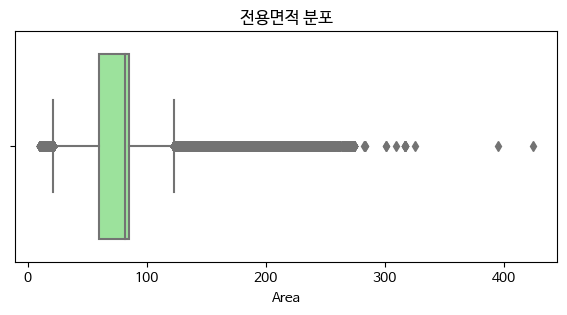

In [154]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = 'Ï†ÑÏö©Î©¥Ï†Å', color='lightgreen')
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨')
plt.xlabel('Area')
plt.show()

In [155]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞©Î≤ïÏóêÎäî IQRÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test dataÏôÄ Îã§Ïãú Ìï©Ï≥êÏ£ºÍ≤†ÏäµÎãàÎã§.
    return result

In [156]:
# ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏö© Î©¥Ï†ÅÏóê ÎåÄÌïú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat_select = remove_outliers_iqr(concat_select, 'Ï†ÑÏö©Î©¥Ï†Å')

In [157]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÏïΩ 10ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÍ±∞Îêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
print(concat_select.shape)

(1038846, 39)


In [158]:
concat_select['is_test'].value_counts()     # ÎòêÌïú, train dataÎßå Ï†úÍ±∞ÎêòÏóàÏäµÎãàÎã§.

0    1029574
1       9272
Name: is_test, dtype: int64

### ÏßÄÌïòÏ∏µÏùÄ 1Í∞íÏúºÎ°ú ÎåÄÏ≤¥

In [159]:
len(concat_select[concat_select['Ï∏µ']<0])

concat_select['Ï∏µ'] = concat_select['Ï∏µ'].apply(lambda x: 1 if x<0 else x)
len(concat_select[concat_select['Ï∏µ']<0])

0

## 4. Feature Engineering
- Ïù¥Ï†ú ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
- ÌååÏÉù Î≥ÄÏàòÎäî ÎèÑÎ©îÏù∏ ÏßÄÏãùÏóê Í∏∞Î∞òÌï¥ Ï†úÏûëÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
- Ï£ºÌÉùÏùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏïΩÍ∞ÑÏùò Î∂ÄÎèôÏÇ∞ ÏßÄÏãùÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [160]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select['Íµ¨'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[1])
concat_select['Îèô'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[2])
del concat_select['ÏãúÍµ∞Íµ¨']

concat_select['Í≥ÑÏïΩÎÖÑ'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
concat_select['Í≥ÑÏïΩÏõî'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
del concat_select['Í≥ÑÏïΩÎÖÑÏõî']

In [161]:
concat_select.columns

Index(['Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'ÏÑ∏ÎåÄÌÉÄÏûÖ',
       'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Í±¥ÏÑ§ÏÇ¨', 'ÏãúÌñâÏÇ¨', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
       'Ï†ÑÏö©Î©¥Ï†Å<60', 'Ï†ÑÏö©Î©¥Ï†Å60~85', 'Ï†ÑÏö©Î©¥Ï†Å85~135', 'ÏàòÏ†ïÏùºÏûê', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï',
       'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú',
       'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test', 'ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ',
       'Í≥ÑÏïΩÏõî'],
      dtype='object')

- ÏÑúÏö∏Ïùò ÏßëÍ∞íÏùÄ Í∞ïÎÇ®, Í∞ïÎ∂Å Ïó¨Î∂ÄÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§Îäî ÏÇ¨Ïã§ÏùÄ ÎßéÏù¥ ÏïåÎ†§ÏßÑ ÏÇ¨Ïã§ÏûÖÎãàÎã§.
- Îî∞ÎùºÏÑú Í∞ïÎÇ®/Í∞ïÎ∂ÅÏùò Ïó¨Î∂ÄÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [162]:
all = list(concat_select['Íµ¨'].unique())
gangnam = ['Í∞ïÏÑúÍµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨', 'ÏÑúÏ¥àÍµ¨', 'Í∞ïÎÇ®Íµ¨', 'ÏÜ°ÌååÍµ¨', 'Í∞ïÎèôÍµ¨']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # ÏïåÎßûÍ≤å Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [163]:
# Í∞ïÎÇ®Ïùò Ïó¨Î∂ÄÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.
is_gangnam = []
for x in concat_select['Íµ¨'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# ÌååÏÉùÎ≥ÄÏàòÎ•º ÌïòÎÇò ÎßåÎ¶ÖÎãàÎã§.
concat_select['Í∞ïÎÇ®Ïó¨Î∂Ä'] = is_gangnam

In [164]:
display(concat_select.columns)

Index(['Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'ÏÑ∏ÎåÄÌÉÄÏûÖ',
       'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Í±¥ÏÑ§ÏÇ¨', 'ÏãúÌñâÏÇ¨', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
       'Ï†ÑÏö©Î©¥Ï†Å<60', 'Ï†ÑÏö©Î©¥Ï†Å60~85', 'Ï†ÑÏö©Î©¥Ï†Å85~135', 'ÏàòÏ†ïÏùºÏûê', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï',
       'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú',
       'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test', 'ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ',
       'Í≥ÑÏïΩÏõî', 'Í∞ïÎÇ®Ïó¨Î∂Ä'],
      dtype='object')

- ÎòêÌïú Ïã†Ï∂ïÏù∏ÏßÄ, Íµ¨Ï∂ïÏù∏ÏßÄÏùò Ïó¨Î∂ÄÎèÑ Ïã§Í±∞ÎûòÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú Í±¥Ï∂ïÎÖÑÎèÑÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º Ï†úÏûëÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [165]:
# Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÌäπÌûà 2005ÎÖÑÏù¥ Q3Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
# 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥ÏßÑ Í±¥Î¨ºÏùÄ 10%Ï†ïÎèÑ ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

count    1.038846e+06
mean     1.998583e+03
std      9.132471e+00
min      1.961000e+03
10%      1.987000e+03
25%      1.992000e+03
50%      2.000000e+03
75%      2.005000e+03
80%      2.006000e+03
90%      2.009000e+03
max      2.023000e+03
Name: Í±¥Ï∂ïÎÖÑÎèÑ, dtype: float64

In [166]:
# Îî∞ÎùºÏÑú 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥Ï°åÏúºÎ©¥ ÎπÑÍµêÏ†Å Ïã†Ï∂ïÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥†, Ïã†Ï∂ï Ïó¨Î∂Ä Î≥ÄÏàòÎ•º Ï†úÏûëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
# 2009 -> 2004ÎÖÑÏúºÎ°ú Í∞í Î≥ÄÍ≤Ω
concat_select['Ïã†Ï∂ïÏó¨Î∂Ä'] = concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].apply(lambda x: 1 if x >= 2004 else 0)    

#### Íµ¨Î≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Î≥ÄÏàò ÏÉùÏÑ±

In [167]:
# Íµ¨Î≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Í≥ÑÏÇ∞
gu_mean_price = concat_select.groupby('Íµ¨')['target'].mean().rename('Íµ¨Î≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©')

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Íµ¨Î≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Ï∂îÍ∞Ä
concat_select = concat_select.merge(gu_mean_price, on='Íµ¨')

In [168]:
display(concat_select['Íµ¨'].head(1))
display(concat_select['Íµ¨Î≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©'].head(1))

0    Í∞ïÎÇ®Íµ¨
Name: Íµ¨, dtype: object

0    95819.995911
Name: Íµ¨Î≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©, dtype: float64

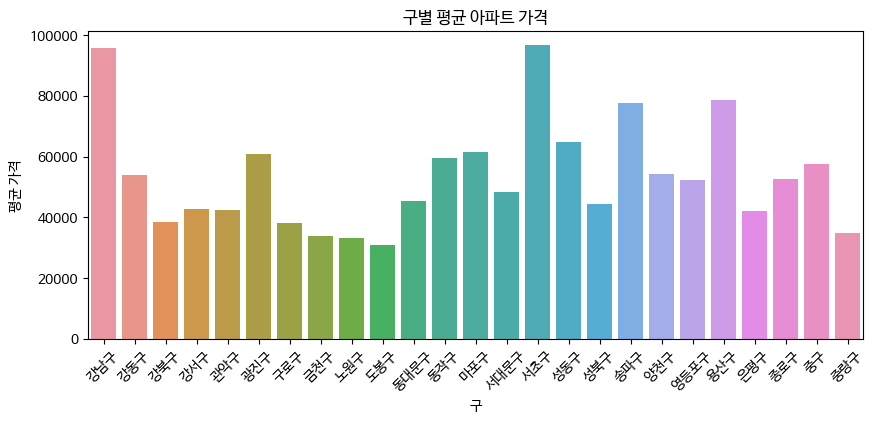

In [169]:
# Íµ¨Î≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Í≥ÑÏÇ∞
gu_avg_price = concat_select.groupby('Íµ¨')['target'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 4))
sns.barplot(x='Íµ¨', y='target', data=gu_avg_price)
plt.title('Íµ¨Î≥Ñ ÌèâÍ∑† ÏïÑÌååÌä∏ Í∞ÄÍ≤©')
plt.xlabel('Íµ¨')
plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤©')
plt.xticks(rotation=45)
plt.show()

In [170]:
concat_select.columns      # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

Index(['Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'ÏÑ∏ÎåÄÌÉÄÏûÖ',
       'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Í±¥ÏÑ§ÏÇ¨', 'ÏãúÌñâÏÇ¨', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
       'Ï†ÑÏö©Î©¥Ï†Å<60', 'Ï†ÑÏö©Î©¥Ï†Å60~85', 'Ï†ÑÏö©Î©¥Ï†Å85~135', 'ÏàòÏ†ïÏùºÏûê', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï',
       'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú',
       'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test', 'ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ',
       'Í≥ÑÏïΩÏõî', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'Íµ¨Î≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©'],
      dtype='object')

#### ÎèôÎ≥ÑÍ∞ÄÍ≤©, ÌëúÏ§ÄÌé∏Ï∞®

In [171]:
# ÎèôÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Î∞è ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
dong_stats = concat_select.groupby('Îèô')['target'].agg(['mean']).rename(columns={'mean': 'ÎèôÎ≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©'})

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÎèôÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Î∞è ÌëúÏ§ÄÌé∏Ï∞® Ï∂îÍ∞Ä
concat_select = concat_select.merge(dong_stats, on='Îèô', how='left')

# Ïª¨ÎüºÎìúÎûç

In [172]:
# Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Ïª¨ÎüºÎìúÎûçÌïòÍ≥† Ïã∂ÏúºÎ©¥ Ïó¨Í∏∞ÏÑú
concat_select.drop(['Ïó∞Î©¥Ï†Å','Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Ï†ÑÏö©Î©¥Ï†Å<60', 
                    'Ï†ÑÏö©Î©¥Ï†Å60~85', 'Ï†ÑÏö©Î©¥Ï†Å85~135'                    
                    ], axis=1, inplace=True)

In [173]:
# ÌäπÏàò Î¨∏ÏûêÎ•º Î∞ëÏ§ÑÎ°ú ÎåÄÏ≤¥ÌïòÎäî Ìï®Ïàò
def clean_column_names(df):
    df.columns = [re.sub(r'\W+', '_', col) for col in df.columns]
    return df

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÌîºÏ≤ò Ïù¥Î¶Ñ Ï†ïÎ¶¨ (LGBRegressor ÏóêÏÑú Î≥ÄÏàòÎ™ÖÏù¥ Î¨∏Ï†úÍ∞Ä ÏÉùÍπÄ)
concat_select = clean_column_names(concat_select)

display(concat_select.columns)
display(concat_select.shape)

Index(['Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'ÏÑ∏ÎåÄÌÉÄÏûÖ',
       'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Í±¥ÏÑ§ÏÇ¨', 'ÏãúÌñâÏÇ¨', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'ÏàòÏ†ïÏùºÏûê',
       'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ_ÏùòÎ¨¥_ÏûÑÎåÄ_ÏûÑÏùò_1_2_3_4', 'Îã®ÏßÄÏäπÏù∏Ïùº',
       'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ_ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test',
       'ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'Íµ¨Î≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©',
       'ÎèôÎ≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©'],
      dtype='object')

(1038846, 40)

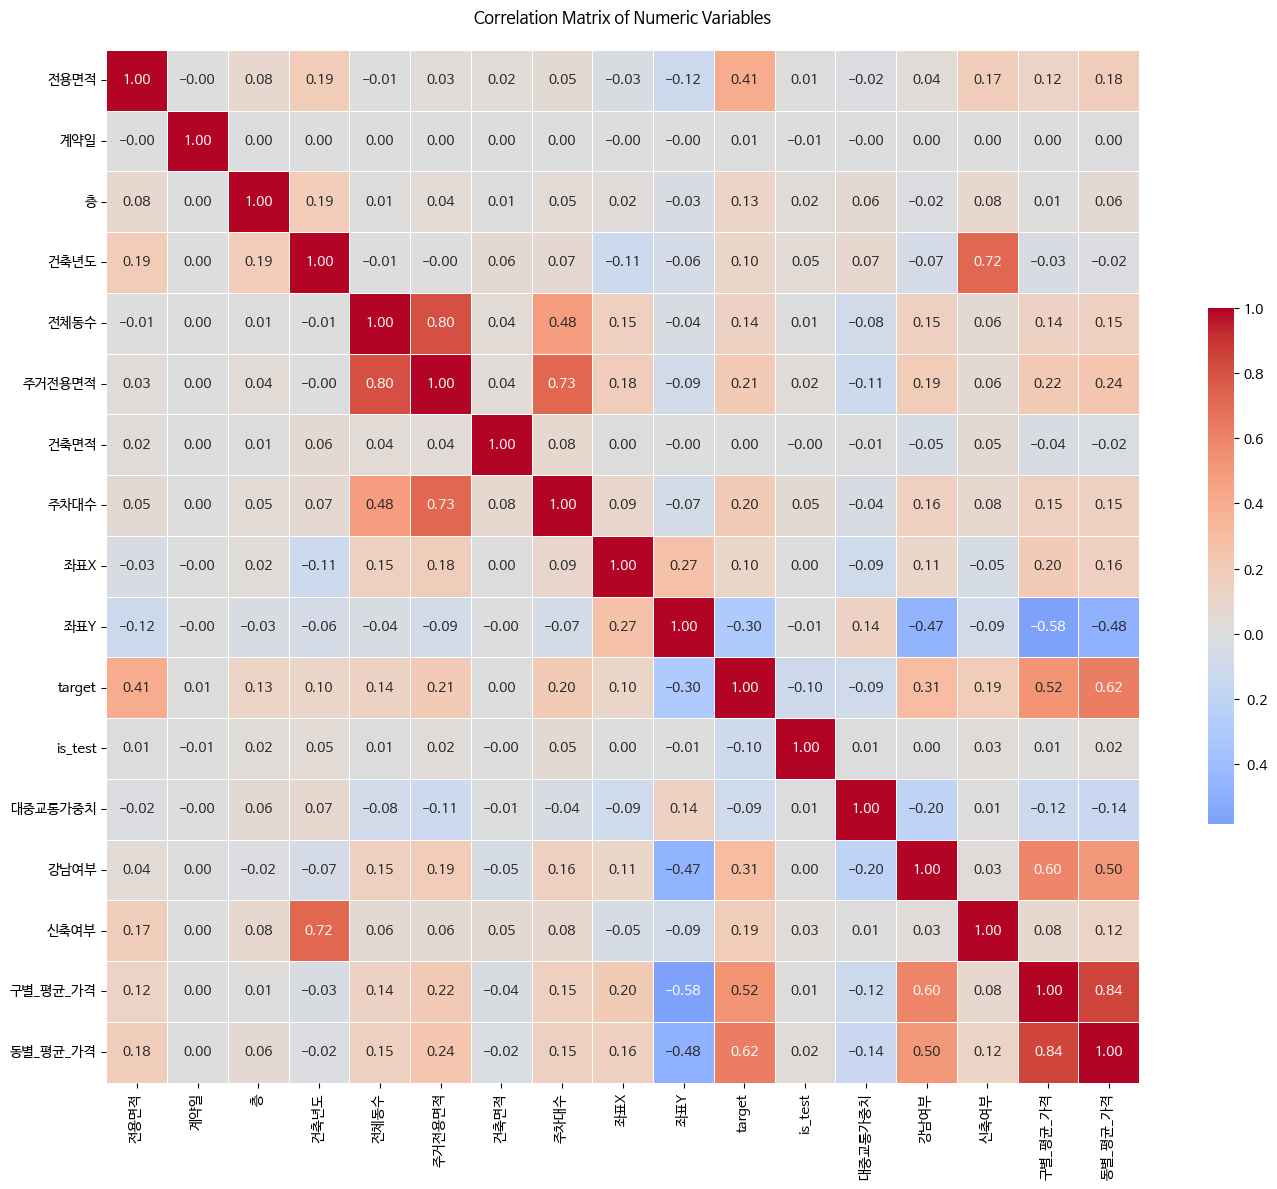

In [174]:
# Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
# correlation_matrix = concat_select.corr()
# plt.figure(figsize=(12, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Heatmap
correlation_matrix = concat_select.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, 
            annot=True,              # ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌëúÏãú
            cmap='coolwarm',         # ÏÉâ
            center=0,                # ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌëúÏãú Ï§ëÏã¨Í∞í 0
            fmt='.2f',              # ÏÜåÏàòÏ†ê 2ÏûêÎ¶¨ ÌëúÏãú
            square=True,            # Ï†ïÏÇ¨Í∞ÅÌòï ÌòïÌÉú
            linewidths=0.5,         # Í∑∏Î¶¨Îìú ÏÑ† ÎëêÍªò
            cbar_kws={"shrink": .5} # ÏÉâÏÉÅ Î∞î ÌÅ¨Í∏∞ Ï°∞Ï†à
           )
plt.title('Correlation Matrix of Numeric Variables', pad=20)
plt.tight_layout()
plt.show()

- ÏúÑ Îëê ÏÇ¨Ìï≠ Ïô∏ÏóêÎèÑ Ïô∏Î∂Ä Í≥µÍ≥µ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÍ±∞ÎÇò, EDAÎ•º ÌÜµÌï¥ Îçî ÎßéÏùÄ Î≥ÄÏàòÎ•º Ï†úÏûëÌï† Ïàò ÏûàÏäµÎãàÎã§.

## 5. Model Training

- Ïù¥Ï†ú ÏúÑÏóêÏÑú ÎßåÎì† ÌååÏÉùÎ≥ÄÏàòÎì§Í≥º Ï†ïÏ†úÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
- Î™®Îç∏ÎßÅÏóêÎäî `sklearn`Ïùò `RandomForest`Î•º Ïù¥Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - `RandomForest`Îäî Î∞∞ÍπÖ(Bagging)Ïùò ÏùºÏ¢ÖÏúºÎ°ú, ÌïôÏäµÏãúÌÇ§Îäî Îç∞Ïù¥ÌÑ∞ Îøê ÏïÑÎãàÎùº ÌäπÏÑ±Î≥ÄÏàò(X)Îì§ÎèÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌï¥ Ìä∏Î¶¨Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÏÑúÎ°ú Îã§Î•∏ NÍ∞úÏùò Tree ÏÉùÏÑ±ÌïòÍ≥†, NÍ∞úÏùò TreeÏóêÏÑú Î∞úÏÉùÌïú OutputÏùÑ Voting(Î≤îÏ£ºÌòï, Î∂ÑÎ•òÎ¨∏Ï†ú)ÌïòÍ±∞ÎÇò, Average(Ïó∞ÏÜçÌòï, ÌöåÍ∑ÄÎ¨∏Ï†ú)Ìï¥ ÏµúÏ¢Ö Output ÏÉùÏÑ±Ìï©ÎãàÎã§.
  - Ïù¥Îäî High variance, Low bias ÏÉÅÌô©ÏóêÏÑú Î∂ÑÏÇ∞(Variance) Í∞êÏÜåÏóê ÎèÑÏõÄÏùÑ Ï§çÎãàÎã§.

In [175]:
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(1029574, 39) (9272, 39)


In [176]:
dt_test.head(1).T

57148
Î≥∏Î≤à                                   658.0
Î∂ÄÎ≤à                                     1.0
ÏïÑÌååÌä∏Î™Ö                                Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±
Ï†ÑÏö©Î©¥Ï†Å                                 79.97
Í≥ÑÏïΩÏùº                                     26
Ï∏µ                                        5
Í±¥Ï∂ïÎÖÑÎèÑ                                  1987
ÎèÑÎ°úÎ™Ö                                  Ïñ∏Ï£ºÎ°ú 3
Îã®ÏßÄÎ∂ÑÎ•ò                                   ÏïÑÌååÌä∏
ÏÑ∏ÎåÄÌÉÄÏûÖ                                    Î∂ÑÏñë
Í¥ÄÎ¶¨Î∞©Ïãù                                  ÏûêÏπòÍ¥ÄÎ¶¨
Î≥µÎèÑÏú†Ìòï                                   Í≥ÑÎã®Ïãù
ÎÇúÎ∞©Î∞©Ïãù                                  Í∞úÎ≥ÑÎÇúÎ∞©
Ï†ÑÏ≤¥ÎèôÏàò                                   8.0
Í±¥ÏÑ§ÏÇ¨                                   Ïö∞ÏÑ±Í±¥ÏÑ§
ÏãúÌñâÏÇ¨                                     Î™®Î¶Ñ
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                             20204.0
ÏàòÏ†ïÏùºÏûê                 2023-09-23 17:21:41.0
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                                 ÏßÅÏòÅ
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï                              Îã®ÏùºÍ≥ÑÏïΩ
Í±¥Ï∂ïÎ©¥Ï†Å                                4858.0
Ï£ºÏ∞®ÎåÄÏàò                                 262.0
Í∏∞ÌÉÄ_ÏùòÎ¨¥_ÏûÑÎåÄ_ÏûÑÏùò_1_2_3_4                     ÏûÑÏùò
Îã®ÏßÄÏäπÏù∏Ïùº                2022-11-17 13:00:29.0
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä                                   Y
Í¥ÄÎ¶¨ÎπÑ_ÏóÖÎ°úÎìú                                  N
Ï¢åÌëúX                              127.05721
Ï¢åÌëúY                              37.476763
Îã®ÏßÄÏã†Ï≤≠Ïùº                2022-11-17 10:19:06.0
target                             13250.0
ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò                                6.5
Íµ¨                                      Í∞ïÎÇ®Íµ¨
Îèô                                      Í∞úÌè¨Îèô
Í≥ÑÏïΩÎÖÑ                                   2023
Í≥ÑÏïΩÏõî                                     07
Í∞ïÎÇ®Ïó¨Î∂Ä                                     1
Ïã†Ï∂ïÏó¨Î∂Ä                                     0
Íµ¨Î≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©                      95819.995911
ÎèôÎ≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©                      87289.596931

In [177]:
# dt_testÏùò targetÏùÄ ÏùºÎã® 0ÏúºÎ°ú ÏûÑÏùòÎ°ú Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
dt_test['target'] = 0

### 5.1. Î≤îÏ£ºÌòï Î≥ÄÏàò Encoding
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê Ìà¨ÏûÖÌïòÎ©¥, Î™®Îç∏Ïù¥ Ï†úÎåÄÎ°ú ÏûëÎèôÌï† Ïàò ÏóÜÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú **Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Í≥ºÏ†ï**ÏùÑ ÌÜµÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ numericÌïòÍ≤å Î∞îÍæ∏Îäî Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

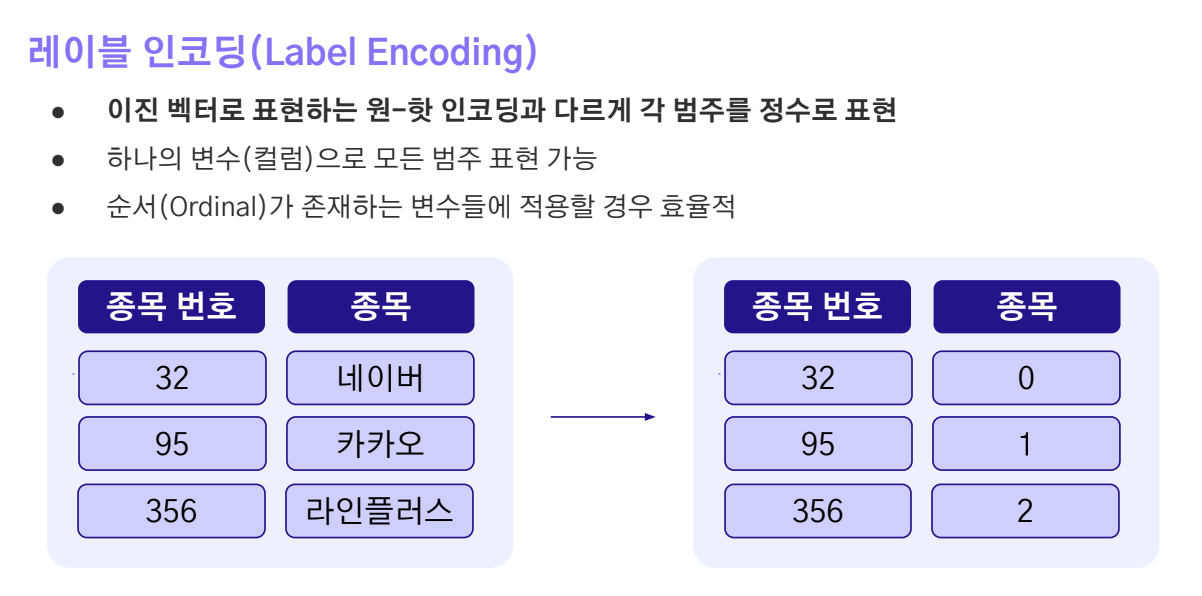

In [178]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_v2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_v2)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'Íµ¨Î≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©', 'ÎèôÎ≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'ÏÑ∏ÎåÄÌÉÄÏûÖ', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Í±¥ÏÑ§ÏÇ¨', 'ÏãúÌñâÏÇ¨', 'ÏàòÏ†ïÏùºÏûê', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Í∏∞ÌÉÄ_ÏùòÎ¨¥_ÏûÑÎåÄ_ÏûÑÏùò_1_2_3_4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ_ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî']


#### ÏàòÏπòÌòï, Ïó∞ÏÜçÌòï Î≥ÄÏàò : Î°úÍ∑∏Î≥ÄÌôò

In [179]:
# continuous_columns_v2 Î°úÍ∑∏Î≥ÄÌôò
for col in continuous_columns_v2:
    dt_train[col] = np.log1p(dt_train[col])
    dt_test[col] = np.log1p(dt_test[col])

# dt_train[continuous_columns_v2].head(5).T        # Î°úÍ∑∏Î≥ÄÌôòÏù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

#### Î≤îÏ£ºÌòï : Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©

In [180]:
# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:06<00:00,  3.77it/s]


In [181]:
# dt_train[categorical_columns_v2].head(5).T        # Label EncodingÏù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

In [182]:
dt_train.head(1).T        # Î†àÏù¥Î∏îÏù∏ÏΩîÎî©Ïù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

0
Î≥∏Î≤à                   1114.000000
Î∂ÄÎ≤à                      1.000000
ÏïÑÌååÌä∏Î™Ö                  292.000000
Ï†ÑÏö©Î©¥Ï†Å                    4.394079
Í≥ÑÏïΩÏùº                     2.197225
Ï∏µ                       1.386294
Í±¥Ï∂ïÎÖÑÎèÑ                    7.594884
ÎèÑÎ°úÎ™Ö                  5520.000000
Îã®ÏßÄÎ∂ÑÎ•ò                    1.000000
ÏÑ∏ÎåÄÌÉÄÏûÖ                    2.000000
Í¥ÄÎ¶¨Î∞©Ïãù                    2.000000
Î≥µÎèÑÏú†Ìòï                    1.000000
ÎÇúÎ∞©Î∞©Ïãù                    1.000000
Ï†ÑÏ≤¥ÎèôÏàò                    2.197225
Í±¥ÏÑ§ÏÇ¨                   237.000000
ÏãúÌñâÏÇ¨                   207.000000
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                  9.913685
ÏàòÏ†ïÏùºÏûê                  201.000000
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                 4.000000
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï                1.000000
Í±¥Ï∂ïÎ©¥Ï†Å                    8.488588
Ï£ºÏ∞®ÎåÄÏàò                    5.572154
Í∏∞ÌÉÄ_ÏùòÎ¨¥_ÏûÑÎåÄ_ÏûÑÏùò_1_2_3_4     4.000000
Îã®ÏßÄÏäπÏù∏Ïùº                 703.000000
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä                  1.000000
Í¥ÄÎ¶¨ÎπÑ_ÏóÖÎ°úÎìú                 0.000000
Ï¢åÌëúX                     4.852477
Ï¢åÌëúY                     3.650055
Îã®ÏßÄÏã†Ï≤≠Ïùº                 240.000000
target                 11.728045
ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò                 2.014903
Íµ¨                       0.000000
Îèô                       8.000000
Í≥ÑÏïΩÎÖÑ                    10.000000
Í≥ÑÏïΩÏõî                    11.000000
Í∞ïÎÇ®Ïó¨Î∂Ä                    0.693147
Ïã†Ï∂ïÏó¨Î∂Ä                    0.000000
Íµ¨Î≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©               11.470237
ÎèôÎ≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©               11.376998

### 5.2. Model Training
- ÏúÑ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ train Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Î™®Îç∏ÏùÄ RandomForestÎ•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
- TrainÍ≥º Valid datasetÏùÑ Î∂ÑÌï†ÌïòÎäî Í≥ºÏ†ïÏóêÏÑúÎäî `holdout` Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. Ïù¥ Î∞©Î≤ïÏùò Í≤ΩÏö∞  ÎåÄÎûµÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Îπ†Î•¥Í≤å ÌôïÏù∏Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏóêÏÑú baselineÏóêÏÑú ÏÇ¨Ïö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïù¥ ÌõÑ Ï∂îÍ∞ÄÏ†ÅÏù∏ edaÎ•º ÌÜµÌï¥ÏÑú ÌèâÍ∞ÄÏÑ∏Ìä∏ÏôÄ Í≤ΩÌñ•ÏùÑ ÎßûÏ∂îÍ±∞ÎÇò kfoldÏôÄ Í∞ôÏùÄ Î∂ÑÌè¨Ïóê ÎåÄÌïú Í≥†Î†§Î•º Ï∂îÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [183]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test datasetÏùò shapeÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

# LGBMRegressor

In [184]:
# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
y = dt_train['target']
X = dt_train.drop(['target'], axis=1)

# LGBMRegressor Ïù¥Ïö©Ìï¥ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.
prjName = "LGBMRegressor"
model = LGBMRegressor(
    n_estimators=15000, 
    criterion='squared_error', 
    random_state=2023, 
    learning_rate=0.05, 
    max_depth=6, 
    early_stopping_rounds=100
    )

# TimeSeriesSplit Í∞ùÏ≤¥ ÏÉùÏÑ± (5Í∞úÏùò Î∂ÑÌï†)
tscv = TimeSeriesSplit(n_splits=5)

# Î≥ÄÏàò Ï§ëÏöîÎèÑÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
feature_importances = []

# RMSE Í∏∞Ï§Ä (ÌèâÍ∑†ÎßêÍ≥† ÌäπÏ†ï Í∏∞Ï§Ä ÌÜµÍ≥ºÌïú Ï§ëÏöîÎèÑÎßå Î≥º Îïå)
rmse_threshold = 0.2  # Ïòà: ÌäπÏ†ï Í∏∞Ï§ÄÏùÑ Ï†ïÌï®

mse_set = []
rmse_set = []
r2_set = []

# TimeSeriesSplitÏùÑ Ïù¥Ïö©Ìïú ÍµêÏ∞® Í≤ÄÏ¶ù
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Î™®Îç∏ ÌïôÏäµ
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)]
    )
    
    # ÏòàÏ∏°
    pred = model.predict(X_test)
    
    # Í≤∞Í≥º
    mse = metrics.mean_squared_error(y_test, pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)

    # # Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï†ÄÏû•
    # feature_importances.append(model.feature_importances_)

    # RMSEÍ∞Ä Í∏∞Ï§Ä Ïù¥ÌïòÏù∏ Í≤ΩÏö∞Îßå Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏàòÏßë (ÌèâÍ∑†ÎßêÍ≥† ÌäπÏ†ï Í∏∞Ï§Ä ÌÜµÍ≥ºÌïú Ï§ëÏöîÎèÑÎßå Î≥º Îïå)
    if rmse < rmse_threshold:
        feature_importances.append(model.feature_importances_)
        mse_set.append(mse)
        rmse_set.append(rmse)
        r2_set.append(r2)

    # ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.
    print(f'RMSE test: {rmse}')

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3741
[LightGBM] [Info] Number of data points in the train set: 171599, number of used features: 38
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Start training from score 10.918479
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

#### ÏàòÏπòÌòï Î°úÍ∑∏ Î≥ÄÌôò ÏõêÎ≥µ

#### wanDB Log : Î™®Îç∏ ÌïôÏäµ Î∞è Í≤∞Í≥º

In [185]:
# wandb Ï¥àÍ∏∞Ìôî
# Î™®Îç∏ Îç∞Ïù¥ÌÑ∞ Î°úÍπÖ
wandb.init(project="Upstage ÏßëÍ∞íÏòàÏ∏°", name=prjName)

# wandb Í≤∞Í≥º Log 
wandb.log({
    "MSE": np.mean(mse_set, axis=0),
    "RMSE": np.mean(rmse_set, axis=0),
    "R2 Score": np.mean(r2_set, axis=0)
})

# Feature importance Í≥ÑÏÇ∞ Î∞è Î°úÍπÖ
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

wandb.log({"feature_importances": wandb.Table(dataframe=feature_importance)})

# wandb Ïã§Ìñâ Ï¢ÖÎ£å
wandb.finish()

- Î≥ÄÏàò Ï§ëÏöîÎèÑÎèÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

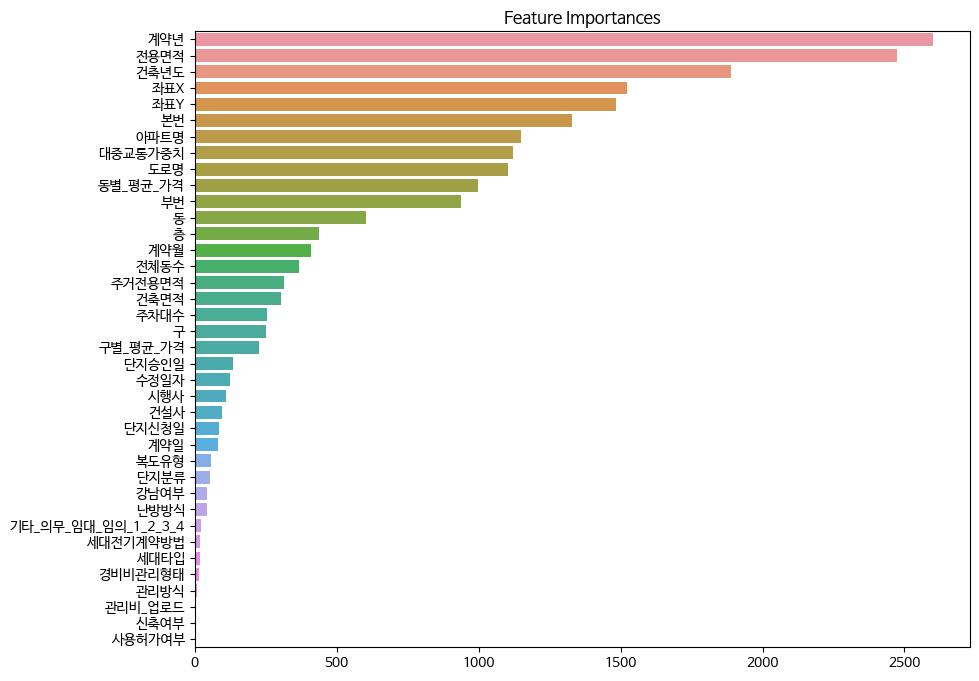

In [186]:
# Î≥ÄÏàò Ï§ëÏöîÎèÑÏùò ÌèâÍ∑† Í≥ÑÏÇ∞
mean_importance = np.mean(feature_importances, axis=0)

# ÏúÑ feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÎãàÎã§.
importances = pd.Series(mean_importance, index=list(X.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [187]:
# ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [188]:
'''
# 1. ÌòÑÏû¨ ÏÉÅÌÉú ÌôïÏù∏
print("X_train columns:", X_train.shape[1])
print("X_test columns:", X_test.shape[1])
# 2. Ïª¨Îüº ÎπÑÍµê
train_cols = set(X_train.columns)
test_cols = set(X_test.columns)
print("\nÏ∞®Ïù¥ÎÇòÎäî Ïª¨ÎüºÎì§:")
print("TrainÏóêÎßå ÏûàÎäî Ïª¨Îüº:", train_cols - test_cols)
print("TestÏóêÎßå ÏûàÎäî Ïª¨Îüº:", test_cols - train_cols)
'''

'\n# 1. ÌòÑÏû¨ ÏÉÅÌÉú ÌôïÏù∏\nprint("X_train columns:", X_train.shape[1])\nprint("X_test columns:", X_test.shape[1])\n# 2. Ïª¨Îüº ÎπÑÍµê\ntrain_cols = set(X_train.columns)\ntest_cols = set(X_test.columns)\nprint("\nÏ∞®Ïù¥ÎÇòÎäî Ïª¨ÎüºÎì§:")\nprint("TrainÏóêÎßå ÏûàÎäî Ïª¨Îüº:", train_cols - test_cols)\nprint("TestÏóêÎßå ÏûàÎäî Ïª¨Îüº:", test_cols - train_cols)\n'

### 5.3. Feature selection

- Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ïú†Ïö©Ìïú Î≥ÄÏàòÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ permutation selectionÏùÑ Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [189]:
# # Permutation importance Í≥ÑÏÇ∞
# result = permutation_importance(
#     model,                # ÌïôÏäµÎêú Î™®Îç∏
#     X_val,                # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±
#     y_val,                # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò ÌÉÄÍ≤ü
#     scoring="neg_mean_squared_error",   # ÌèâÍ∞Ä ÏßÄÌëú (ÌöåÍ∑Ä Î¨∏Ï†úÏù¥ÎØÄÎ°ú ÏùåÏùò MSE ÏÇ¨Ïö©)
#     n_repeats=3,          # Î∞òÎ≥µ ÌöüÏàò
#     random_state=42
# )

# # Ï§ëÏöîÎèÑ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ÌïòÏó¨ Ï∂úÎ†•
# importance_df = pd.DataFrame({
#     'feature': X_val.columns,
#     'importance_mean': result.importances_mean,
#     'importance_std': result.importances_std
# }).sort_values(by='importance_mean', ascending=False)

# # Í≤∞Í≥º Ï∂úÎ†•
# print(importance_df)

- Î∂ÑÏÑù Í≤∞Í≥º "Í≥ÑÏïΩÎÖÑ", "Ï†ÑÏö©Î©¥Ï†Å" Î≥ÄÏàòÍ∞Ä Ïú†ÏùòÌïú Î≥ÄÏàòÎ°ú Î≥¥ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ Î≥ÄÏàòÎ°ú Îòê Îã§Î•∏ ÌååÏÉùÎ≥ÄÏàòÎ•º Îçî ÏÉùÏÑ±Ìï¥Î≥¥Í±∞ÎÇò, Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÏïÑÎ≥¥Ïù¥Îäî Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï¥ Ï∞®ÏõêÏùò Ï†ÄÏ£ºÎ•º ÎßâÏïÑÎ≥º ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

### 5.4. Valid prediction Î∂ÑÏÑù

- ÏòàÏ∏°Í∞íÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Í∏∞ ÏúÑÌï¥ valid predictionÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [190]:
# # Validation datasetÏóê targetÍ≥º pred Í∞íÏùÑ Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
# X_val['target'] = y_val
# X_val['pred'] = pred

In [191]:
# # Squared_errorÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
# def calculate_se(target, pred):
#     squared_errors = (target - pred) ** 2
#     return squared_errors

# # RMSE Í≥ÑÏÇ∞
# squared_errors = calculate_se(X_val['target'], X_val['pred'])
# X_val['error'] = squared_errors

In [192]:
# # ErrorÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
# X_val_sort = X_val.sort_values(by='error', ascending=False)       # ÎÇ¥Î¶ºÏ∞®Ïàú sorting

In [193]:
# X_val_sort.head()

- ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄ Î™ªÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [194]:
# X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄÎ™ªÌïú top 100Í∞úÏùò data
# X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò data

In [195]:
# #Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ ÏàòÏπòÌòï Î°úÍ∑∏ Î≥ÄÌôò ÏõêÎ≥µ
# for col in continuous_columns_v2:
#     dt_train[col] = np.expm1(dt_train[col])
#     dt_test[col] = np.expm1(dt_test[col])

#  # Î°úÍ∑∏Î≥ÄÌôòÏùÑ ÏõêÎ≥µÌïú Î™®ÏäµÏûÖÎãàÎã§.
# # dt_train[continuous_columns_v2].head(5).T  

In [196]:
# dt_train['target'].head(1)
# dt_test['target'].head(1)

In [197]:
# # Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î≤îÏ£ºÌòï Î†àÏù¥Î∏îÏù∏ÏΩîÎî© Îêú Î≥ÄÏàòÎ•º Î≥µÏõêÌï¥Ï§çÎãàÎã§.
# error_top100 = X_val_sort_top100.copy()
# for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
#     error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

# best_top100 = X_val_sort_tail100.copy()
# for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
#     best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [198]:
# display(error_top100.head(1))
# display(best_top100.head(1))

- Ïù¥Ï†ú Î∂ÑÌè¨Î•º ÎπÑÍµêÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [199]:
# sns.boxplot(data = error_top100, x='target')
# plt.title('The worst top100 predictionÏùò target Î∂ÑÌè¨')
# plt.show()

# sns.boxplot(data = best_top100, x='target', color='orange')
# plt.title('The best top100 predictionÏùò target Î∂ÑÌè¨')
# plt.show()

- Taget Î∂ÑÌè¨Î•º Î≥¥Îãà Ï¢ãÏùÄ ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100Í∞úÏùò dataÎ≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100 datasetÎì§Ïù¥ ÎÜíÏùÄ Í∞ÄÍ≤©ÏùÑ Î≥¥ÏòÄÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌïú Î™®Îç∏ÎßÅ Î∞è Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÖÎãàÎã§.

In [200]:
# sns.histplot(data = error_top100, x='Ï†ÑÏö©Î©¥Ï†Å', alpha=0.5)
# sns.histplot(data = best_top100, x='Ï†ÑÏö©Î©¥Ï†Å', color='orange', alpha=0.5)
# plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨ ÎπÑÍµê')
# plt.show()

- Ï†ÑÏö©Î©¥Ï†Å ÎòêÌïú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ ÏßëÎì§Ïù¥ Îçî ÎÑìÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 6. Inference

In [201]:
dt_test.head(1).T      # test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

57148
Î≥∏Î≤à                   1114.000000
Î∂ÄÎ≤à                      1.000000
ÏïÑÌååÌä∏Î™Ö                  292.000000
Ï†ÑÏö©Î©¥Ï†Å                    4.394079
Í≥ÑÏïΩÏùº                     3.295837
Ï∏µ                       1.791759
Í±¥Ï∂ïÎÖÑÎèÑ                    7.594884
ÎèÑÎ°úÎ™Ö                  5520.000000
Îã®ÏßÄÎ∂ÑÎ•ò                    1.000000
ÏÑ∏ÎåÄÌÉÄÏûÖ                    2.000000
Í¥ÄÎ¶¨Î∞©Ïãù                    2.000000
Î≥µÎèÑÏú†Ìòï                    1.000000
ÎÇúÎ∞©Î∞©Ïãù                    1.000000
Ï†ÑÏ≤¥ÎèôÏàò                    2.197225
Í±¥ÏÑ§ÏÇ¨                   237.000000
ÏãúÌñâÏÇ¨                   207.000000
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                  9.913685
ÏàòÏ†ïÏùºÏûê                  201.000000
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                 4.000000
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï                1.000000
Í±¥Ï∂ïÎ©¥Ï†Å                    8.488588
Ï£ºÏ∞®ÎåÄÏàò                    5.572154
Í∏∞ÌÉÄ_ÏùòÎ¨¥_ÏûÑÎåÄ_ÏûÑÏùò_1_2_3_4     4.000000
Îã®ÏßÄÏäπÏù∏Ïùº                 703.000000
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä                  1.000000
Í¥ÄÎ¶¨ÎπÑ_ÏóÖÎ°úÎìú                 0.000000
Ï¢åÌëúX                     4.852477
Ï¢åÌëúY                     3.650055
Îã®ÏßÄÏã†Ï≤≠Ïùº                 240.000000
target                  0.000000
ÎåÄÏ§ëÍµêÌÜµÍ∞ÄÏ§ëÏπò                 2.014903
Íµ¨                       0.000000
Îèô                       8.000000
Í≥ÑÏïΩÎÖÑ                    16.000000
Í≥ÑÏïΩÏõî                     6.000000
Í∞ïÎÇ®Ïó¨Î∂Ä                    0.693147
Ïã†Ï∂ïÏó¨Î∂Ä                    0.000000
Íµ¨Î≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©               11.470237
ÎèôÎ≥Ñ_ÌèâÍ∑†_Í∞ÄÍ≤©               11.376998

In [202]:
# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [203]:
%%time
X_test = dt_test.drop(['target'], axis=1)

# Test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
predicted_log2 = model.predict(X_test)
real_test_pred = np.expm1(predicted_log2)  # ÏõêÎûò Í∞íÏúºÎ°ú Ïó≠Î≥ÄÌôò

[LightGBM] [Warning] Unknown parameter: criterion
CPU times: user 118 ms, sys: 0 ns, total: 118 ms
Wall time: 20.1 ms


In [204]:
real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

array([202853.51401894, 252226.00405337, 228378.42028871, ...,
        83797.68511254,  84426.23678091,  78418.34728936])

In [205]:
real_test_pred.shape

(9272,)

## 7. Output File Save

In [206]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í∏∏Ïù¥Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§
num_test_rows = 9273 - 1  # ÏÉòÌîå ÌååÏùºÏùò Ìñâ ÏàòÏóê ÎßûÏ∂•ÎãàÎã§

# ÏòàÏ∏° Í∞íÏùò Í∏∏Ïù¥Î•º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∏Ïù¥Ïóê ÎßûÏ∂•ÎãàÎã§.
# ÎßåÏïΩ ÏòàÏ∏° Í∞íÏù¥ Î∂ÄÏ°±Ìïú Í≤ΩÏö∞ÏóêÎäî 0 ÎòêÎäî ÌèâÍ∑†Í∞íÏúºÎ°ú Ï±ÑÏö∏ Ïàò ÏûàÏäµÎãàÎã§.
if len(real_test_pred) < num_test_rows:
    real_test_pred = np.pad(real_test_pred, (0, num_test_rows - len(real_test_pred)), 'constant', constant_values=real_test_pred.mean())

# ÏïûÏÑú ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)